In [2]:
# Author: Arthur Prigent
# Email: aprigent@geomar.de

In [2]:
import xarray as xr 
#import xgcm 
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import glob
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mticker
import cartopy
from scipy import stats
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
now = datetime.now()


path_data_out = '/data/user/aprigent/projects/uncertainty_ATL3_ABA/data/'

# List of models and scenarios

In [3]:
model_list_CMIP5=['ACCESS1-0','ACCESS1-3','bcc-csm1-1-m','bcc-csm1-1','BNU-ESM',
            'CanESM2','CCSM4','CESM1-BGC','CESM1-CAM5','CMCC-CM','CMCC-CMS','CNRM-CM5','CSIRO-Mk3-6-0',
            'FGOALS-g2','GFDL-CM3','GFDL-ESM2G','GFDL-ESM2M','GISS-E2-H-CC','GISS-E2-H',
            'GISS-E2-R-CC','GISS-E2-R','HadGEM2-CC','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','IPSL-CM5A-MR','IPSL-CM5B-LR',
            'MIROC-ESM-CHEM','MIROC-ESM','MIROC5','MPI-ESM-LR','MPI-ESM-MR','MRI-CGCM3','NorESM1-M','NorESM1-ME']

scenario_CMIP5=['rcp45','rcp85']


model_list_CMIP6=['ACCESS-CM2','ACCESS-ESM1-5','AWI-CM-1-1-MR','BCC-CSM2-MR','CAMS-CSM1-0',
            'CESM2-WACCM','FGOALS-f3-L','FGOALS-g3','GFDL-CM4','GFDL-ESM4','INM-CM4-8',
            'INM-CM5-0','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3',
            'NorESM2-LM','NorESM2-MM']

scenario_CMIP6=['ssp245','ssp585']
model_all = np.hstack([model_list_CMIP5,model_list_CMIP6])


path_fig='/data/user/aprigent/projects/uncertainty_ATL3_ABA/figures/'
path_data_out = '/data/user/aprigent/projects/uncertainty_ATL3_ABA/data/'



In [4]:
running_mean_atl3_tmp_cmip5 = xr.open_dataset(path_data_out+'ATL3_amplitude_CMIP5.nc')
running_mean_atl3_tmp_cmip5['scenario'] = scenario_CMIP6
running_mean_atl3_tmp_cmip6 = xr.open_dataset(path_data_out+'ATL3_amplitude_CMIP6.nc')

running_mean_atl3_tmp = xr.concat([running_mean_atl3_tmp_cmip5,running_mean_atl3_tmp_cmip6],dim='model')

running_mean_atl3 = running_mean_atl3_tmp.sel(time=slice(datetime(1900, 1, 1),datetime(2085, 12, 31)))

In [5]:
X = np.arange(0,running_mean_atl3.amp_ATL3.shape[2],1)
Xf_tmp = np.ones((running_mean_atl3.amp_ATL3.shape))*np.nan
for i in range(Xf_tmp.shape[0]):
    for j in range(Xf_tmp.shape[1]):
        Y = running_mean_atl3.amp_ATL3[i,j,:]
        p2 = np.polyfit(X,Y,deg=2)
        p3 = np.polyfit(X,Y,deg=3)
        p4 = np.polyfit(X,Y,deg=4)
        p5 = np.polyfit(X,Y,deg=5)

        Xf_n2 = np.polyval(p2,X)
        Xf_n3 = np.polyval(p3,X)
        Xf_n4 = np.polyval(p4,X)
        Xf_n5 = np.polyval(p5,X)

        Xf_tmp[i,j,:] = Xf_n2
Xf = xr.Dataset({'Xf': (['scenario','model','time'], Xf_tmp),
                               },
                      coords={'scenario': np.array(scenario_CMIP6),
                              'model': np.array(model_all),
                              'time':running_mean_atl3.time} )

# Figure S1

<xarray.DataArray 'model' ()>
array('ACCESS-CM2', dtype='<U10')
Coordinates:
    model    <U10 'ACCESS-CM2'


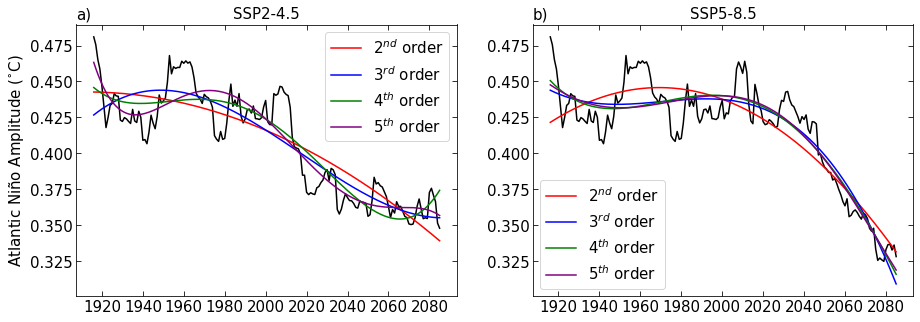

In [9]:
f,ax = plt.subplots(1,2,figsize=[15,5],sharey=True)

ax=ax.ravel()

ftz=15
model_index = -20
print(running_mean_atl3.model[model_index])
scenario_index = 0

X = np.arange(0,running_mean_atl3.amp_ATL3.shape[2],1)
Y = running_mean_atl3.amp_ATL3[scenario_index,model_index,:]
p2 = np.polyfit(X,Y,deg=2)
p3 = np.polyfit(X,Y,deg=3)
p4 = np.polyfit(X,Y,deg=4)
p5 = np.polyfit(X,Y,deg=5)

Xf_n2 = np.polyval(p2,X)
Xf_n3 = np.polyval(p3,X)
Xf_n4 = np.polyval(p4,X)
Xf_n5 = np.polyval(p5,X)

ax[0].plot(running_mean_atl3.time,running_mean_atl3.amp_ATL3[scenario_index,model_index,:],color='black')
ax[0].plot(running_mean_atl3.time,Xf_n2,color='red',label='2$^{nd}$ order')
ax[0].plot(running_mean_atl3.time,Xf_n3,color='blue',label='3$^{rd}$ order')
ax[0].plot(running_mean_atl3.time,Xf_n4,color='green',label='4$^{th}$ order')
ax[0].plot(running_mean_atl3.time,Xf_n5,color='purple',label='5$^{th}$ order')
ax[0].tick_params(labelsize=ftz)
ax[0].legend(fontsize=ftz)
ax[0].set_ylabel('Atlantic Niño Amplitude ($^{\circ}$C)',fontsize=ftz)
ax[0].set_title('SSP2-4.5',fontsize=ftz)



X = np.arange(0,running_mean_atl3.amp_ATL3.shape[2],1)
Y = running_mean_atl3.amp_ATL3[scenario_index+1,model_index,:]
p2 = np.polyfit(X,Y,deg=2)
p3 = np.polyfit(X,Y,deg=3)
p4 = np.polyfit(X,Y,deg=4)
p5 = np.polyfit(X,Y,deg=5)

Xf_n2 = np.polyval(p2,X)
Xf_n3 = np.polyval(p3,X)
Xf_n4 = np.polyval(p4,X)
Xf_n5 = np.polyval(p5,X)
ax[1].plot(running_mean_atl3.time,running_mean_atl3.amp_ATL3[scenario_index+1,model_index,:],color='black')
ax[1].plot(running_mean_atl3.time,Xf_n2,color='red',label='2$^{nd}$ order')
ax[1].plot(running_mean_atl3.time,Xf_n3,color='blue',label='3$^{rd}$ order')
ax[1].plot(running_mean_atl3.time,Xf_n4,color='green',label='4$^{th}$ order')
ax[1].plot(running_mean_atl3.time,Xf_n5,color='purple',label='5$^{th}$ order')
ax[1].tick_params(labelsize=ftz)
ax[1].legend(fontsize=ftz)
#ax[1].set_ylabel('Atlantic Nino Amplitude ($^{\circ}$C)',fontsize=ftz)
ax[1].set_title('SSP5-8.5',fontsize=ftz)

ax[0].text(0,
         1.02, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.02, 'b)',transform=ax[1].transAxes,size=ftz)
ax[0].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=5,direction='in')
ax[1].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=5,direction='in')

plt.savefig(path_fig + 'figure_S1_ATL3_polynomial_fit.png',
             dpi = 300,
            bbox_inches='tight')